<a href="https://colab.research.google.com/github/ark150/PracticaSIDI2Semana1/blob/master/SIDI2_practica_de_distribucion_de_memoria_y_tiempos_de_ejecucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practica donde se ve el tamaño de memoria ocupado para el analisis y ejecucion de funciones sobre grandes cantidades de datos


Se importan las librerias y la funcion para poder obtener la memoria que se acaba de cargar

In [0]:
import numpy as np
import pandas as pd
import psutil, os
from time import time
from dask import delayed
def huella_de_memoria():
  '''regresa la memoria usada por un proceso en python'''
  mem= psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)

comandos para obtener los datos

In [0]:
plantilla = 'yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/'+plantilla
for y in range(1,13):
  print(plantillaURL.format(y))
comandos= [plantillaURL.format(y) for y in range(1,13)]
for cmd in comandos:
  os.system(cmd)

wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-02.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-03.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-04.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-05.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-06.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-07.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-08.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-09.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-10.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-11.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-12.csv


In [0]:
plantilla = 'yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/'+plantilla
for y in range(1,13):
  print(plantillaURL.format(y))

wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-02.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-03.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-04.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-05.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-06.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-07.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-08.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-09.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-10.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-11.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-12.csv


In [0]:
ls

sample_data/                 yellow_tripdata_2018-07.csv
yellow_tripdata_2018-01.csv  yellow_tripdata_2018-08.csv
yellow_tripdata_2018-02.csv  yellow_tripdata_2018-09.csv
yellow_tripdata_2018-03.csv  yellow_tripdata_2018-10.csv
yellow_tripdata_2018-04.csv  yellow_tripdata_2018-11.csv
yellow_tripdata_2018-05.csv  yellow_tripdata_2018-12.csv
yellow_tripdata_2018-06.csv


funciones de prueba

In [0]:
def cuenta_viajes_tardados(df):
  df['duracion'] =(df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds
  es_viaje_tardado = df.duracion > 1200
  result_dict = {'n_long': [sum(es_viaje_tardado)],
                'n_total': [len(df)]}
  return pd.DataFrame(result_dict)

In [0]:
%%time
tiempo_inicial = time()

archivos = [plantilla.format(y) for y in range(1,13)]

tiempo_final = time() 
 
tiempo_ejecucion = tiempo_final - tiempo_inicial
 
print( 'El tiempo de ejecucion fue:',tiempo_ejecucion )


El tiempo de ejecucion fue: 1.33514404296875e-05
CPU times: user 1.7 ms, sys: 140 µs, total: 1.84 ms
Wall time: 1.48 ms


In [0]:
%%time
antes = huella_de_memoria()
tiempo_inicial = time()

dataframes = [pd.read_csv(archivo, parse_dates=[1,2]) for archivo in archivos]

despues = huella_de_memoria()
tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial
print( 'El tiempo de ejecucion fue:',tiempo_ejecucion )
print(despues-antes)

In [0]:
%%time
antes = huella_de_memoria()
tiempo_inicial = time()

totales = [cuenta_viajes_tardados(df) for df in dataframes]

despues = huella_de_memoria()
tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial
print( 'El tiempo de ejecucion fue:',tiempo_ejecucion )
print(despues-antes)

El tiempo de ejecucion fue: 8.539353132247925
15.87109375
CPU times: user 8.38 s, sys: 145 ms, total: 8.53 s
Wall time: 8.54 s


In [0]:
%%time
antes = huella_de_memoria()
tiempo_inicial = time()

totales_trimestrales = sum(totales)

despues = huella_de_memoria()
tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial
print( 'El tiempo de ejecucion fue:',tiempo_ejecucion )
print(despues-antes)

El tiempo de ejecucion fue: 0.04426240921020508
0.09375
CPU times: user 18.4 ms, sys: 14.1 ms, total: 32.4 ms
Wall time: 45.5 ms


In [0]:
%%time
tiempo_inicial = time()
print(totales_trimestrales)

tiempo_final = time() 
 
tiempo_ejecucion = tiempo_final - tiempo_inicial
 
print( 'El tiempo de ejecucion fue:',tiempo_ejecucion )

     n_long   n_total
0  10954358  53925735
El tiempo de ejecucion fue: 0.011954307556152344
CPU times: user 9.84 ms, sys: 988 µs, total: 10.8 ms
Wall time: 12.8 ms


In [0]:
%%time
tiempo_inicial = time()

print(totales_trimestrales['n_long']/totales_trimestrales['n_total'])

tiempo_final = time() 
 
tiempo_ejecucion = tiempo_final - tiempo_inicial
 
print( 'El tiempo de ejecucion fue:',tiempo_ejecucion )

0    0.203138
dtype: float64
El tiempo de ejecucion fue: 0.008041143417358398
CPU times: user 2.84 ms, sys: 989 µs, total: 3.83 ms
Wall time: 9.3 ms


Generadores y delayed

In [0]:
import numpy as np
import pandas as pd
import psutil, os
from time import time
from dask import delayed
def huella_de_memoria():
  '''regresa la memoria usada por un proceso en python'''
  mem= psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)

In [0]:
plantilla = 'yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/'+plantilla
for y in range(1,13):
  print(plantillaURL.format(y))

wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-02.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-03.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-04.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-05.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-06.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-07.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-08.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-09.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-10.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-11.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-12.csv


In [0]:
@delayed
def cuenta_viajes_tardados(df):
  df['duracion'] =(df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds
  es_viaje_tardado = df.duracion > 1200
  result_dict = {'n_long': [sum(es_viaje_tardado)],
                'n_total': [len(df)]}
  return pd.DataFrame(result_dict)

@delayed
def abre_archivo(nombre):
  return pd.read_csv(nombre, parse_dates=[1,2])

In [0]:
%%time
antes = huella_de_memoria()
tiempo_inicial = time()


#aqui van las funciones a ejecutar
archivos = [plantilla.format(y) for y in range(1,10)]
totales= [cuenta_viajes_tardados(abre_archivo(archivo)) for archivo in archivos]
semi_anuales = sum(totales)
semi_anuales.compute()


despues = huella_de_memoria()
tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial
print( 'El tiempo de ejecucion fue:',tiempo_ejecucion )
print(despues-antes)

El tiempo de ejecucion fue: 294.05335235595703
4589.93359375
CPU times: user 5min 14s, sys: 16.6 s, total: 5min 31s
Wall time: 4min 54s


#arreglos y dask para ver la distribucion 

In [0]:
import numpy as np
import dask.array as da
from time import time



In [41]:
a= np.random.rand(10000)
print(a.shape, a.dtype, a.nbytes)
a_dask = da.from_array(a, chunks=len(a)//3)
a_dask.chunks

(10000,) float64 80000


((3333, 3333, 3333, 1),)

In [42]:
%%time
n_chunks=8
chunk_size=len(a)// n_chunks
result=0

for k in range(n_chunks):
  offset = k*chunk_size
  a_chunk = a[offset:offset+chunk_size]
  result += a_chunk.sum()
print(result)
result_dask = a_dask.sum()
result_dask.compute()


4989.732843996452
CPU times: user 10.2 ms, sys: 9 µs, total: 10.2 ms
Wall time: 18.5 ms


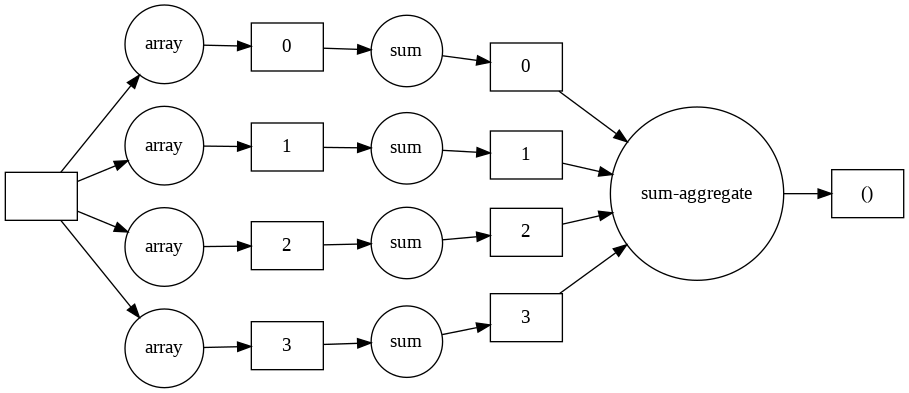

In [43]:
result_dask.visualize(rankdir='LR')

#medicion de tiempo

In [0]:
!wget https://www.gw-osc.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5

In [0]:
!cp H-H1_LOSC_4_V1-815411200-4096.hdf5 LIGO_data.hdf5

In [0]:
import h5py, time
import numpy as np
import dask.array as da
datos= h5py.File('./LIGO_data.hdf5')

In [0]:
with h5py.File('./LIGO_data.hdf5') as dset:
  strain =dset['strain']['Strain'][:]

In [35]:
strain_dask8 = da.from_array(strain, chunks=strain.shape[0]//4)
ti = time.time()
promedio8= strain_dask8.mean().compute()
tf = time.time()
print('tiempo transcurrido: {} ms'.format((tf-ti)*1000))
print(promedio8)

tiempo transcurrido: 65.38915634155273 ms
nan


In [43]:
connum = np.array(strain)
np.array_split(connum, strain.shape[0]//16)
ti = time.time()
promedio2= connum.mean()
tf = time.time()
print('tiempo transcurrido: {} ms'.format((tf-ti)*1000))

tiempo transcurrido: 17.73524284362793 ms


In [31]:
promedio2

nan

In [32]:
promedio8

nan